# Exercício 1

In [11]:
pip install hydroeval

  Using cached hydroeval-0.1.0-py3-none-any.whl (22 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
%reset -f

import numpy as np
import hydroeval as he
from scipy import integrate
from scipy.special import gamma

import matplotlib.pyplot as plt
# Ajustando gráficos inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

ModuleNotFoundError: No module named 'hydroeval'

Ajuste o modelo Nash aos dados apresentados na tabela a seguir.
Considerar os dados como sendo de precipitação efetiva e escoamento superficial.
Estabeleça $K$ e $n$ por tentativa e erro e pelo método dos momentos.
Representar graficamente os hidrogramas observado e estimados.

| Tempo | Precipitação (mm) | Vazão (mm/$\Delta$t) |
|-------|-------------------|----------------------|
| 1     | 1,67              | 1,35                 |
| 2     | 6,66              | 4,01                 |
| 3     |                   | 1,03                 |
| 4     |                   | 0,55                 |
| 5     |                   | 0,38                 |
| 6     |                   | 0,30                 |
| 7     |                   | 0,23                 |
| 8     |                   | 0,17                 |
| 9     |                   | 0,12                 |
| 10    |                   | 0,08                 |
| 11    |                   | 0,05                 |
| 12    |                   | 0,03                 |
| 13    |                   | 0,02                 |
| 14    |                   | 0,01                 |

In [ ]:
t = [i for i in range(1,15)]
T = len(t)
P = [1.67, 6.66] + [0] * (T-2)
Q = [
    1.35, 4.01, 1.03, 0.55, 0.38, 0.30, 0.23, 
    0.17, 0.12, 0.08, 0.05, 0.03, 0.02, 0.01,
]

## Determinação dos parâmetros $n$ e $K$

### Hidrograma Unitário Instantâneo

$$
    \mu(t) = \dfrac{1}{K} \left(\dfrac{t}{K}\right)^{n-1} \dfrac{e^{-t/K}}{\Gamma(n)}
$$

In [ ]:
u_nash = lambda t, K, n : np.exp(-t/K) / (K * gamma(n)) * (t / K)**(n-1)

#### Por tentativa

Valores de n entre 0.1 e 10, com variação de 0.1  
Valores de K entre 0.1 e 10, com variação de 0.1

In [ ]:
n_tentativas = np.arange(0.1, 10, 0.1)
K_tentativas = np.arange(0.1, 10, 0.1)
max_nse = [0, 0, 0]

for n in n_tentativas:
    for K in K_tentativas:
        hu_nash = [0] * T
        for i in t:  # para todos os instantes
            hu_nash[i-1] = integrate.quad(u_nash, i-1, i, args=(K,n))[0]
        # plt.plot(hu_nash)

        Q_nash = [0] * T
        for i in range(T):
            if i == 0:  # primeiro instante de tempo
                Q_nash[i] = P[0] * hu_nash[0]
            else:
                Q_nash[i] = P[0] * hu_nash[i] + P[1] * hu_nash[i-1]
                
        nse = he.nse(np.array(Q_nash), np.array(Q))
        if nse > max_nse[0]:
            max_nse = [nse, n, K]

print("Melhor desempenho:")
print("NSE =", max_nse[0])
print("n =", max_nse[1])
print("K =", max_nse[2])

In [ ]:
n = 0.4
K = 4.5

hu_nash = [0] * T
for i in t:  # para todos os instantes
    hu_nash[i-1] = integrate.quad(u_nash, i-1, i, args=(K,n))[0]
# plt.plot(hu_nash)

Q_nash = [0] * T
for i in range(T):
    if i == 0:  # primeiro instante de tempo
        Q_nash[i] = P[0] * hu_nash[0]
    else:
        Q_nash[i] = P[0] * hu_nash[i] + P[1] * hu_nash[i-1]

In [ ]:
plt.plot(t, Q_nash, "^-", label="Série Histórica", color="#488f31")
plt.plot(t, Q, ".-", label="Simulação (n = "+str(n)+", K = "+str(K)+")", color="#de425b")
plt.bar(t, P, width=0.5, label="Precipitação", alpha=0.2)
plt.xticks(t)
plt.xlabel("Tempo ($\Delta t$)")
plt.ylabel("P (mm) e Q (mm/$\Delta t$)")
plt.legend()
plt.tight_layout()
plt.savefig("nash_1_1casa.png", format="png", dpi=300)
plt.show()

Valores de n entre 0.1 e 2, com variação de 0.01  
Valores de K entre 3.1 e 6, com variação de 0.01

In [ ]:
n_tentativas = np.arange(0.1, 2, 0.01)
K_tentativas = np.arange(3.1, 6, 0.01)
max_nse = [0, 0, 0]

for n in n_tentativas:
    for K in K_tentativas:
        hu_nash = [0] * T
        for i in t:  # para todos os instantes
            hu_nash[i-1] = integrate.quad(u_nash, i-1, i, args=(K,n))[0]
        # plt.plot(hu_nash)

        Q_nash = [0] * T
        for i in range(T):
            if i == 0:  # primeiro instante de tempo
                Q_nash[i] = P[0] * hu_nash[0]
            else:
                Q_nash[i] = P[0] * hu_nash[i] + P[1] * hu_nash[i-1]
                
        nse = he.nse(np.array(Q_nash), np.array(Q))
        if nse > max_nse[0]:
            max_nse = [nse, n, K]

print("Melhor desempenho:")
print("NSE =", max_nse[0])
print("n =", max_nse[1])
print("K =", max_nse[2])

In [ ]:
n = round(max_nse[1], 2)
K = round(max_nse[2], 2)

hu_nash = [0] * T
for i in t:  # para todos os instantes
    hu_nash[i-1] = integrate.quad(u_nash, i-1, i, args=(K,n))[0]
# plt.plot(hu_nash)

Q_nash = [0] * T
for i in range(T):
    if i == 0:  # primeiro instante de tempo
        Q_nash[i] = P[0] * hu_nash[0]
    else:
        Q_nash[i] = P[0] * hu_nash[i] + P[1] * hu_nash[i-1]

In [ ]:
plt.plot(t, Q_nash, "^-", label="Série Histórica", color="#488f31")
plt.plot(t, Q, ".-", label="Simulação (n = "+str(n)+", K = "+str(K)+")", color="#de425b")
plt.bar(t, P, width=0.5, label="Precipitação", alpha=0.2)
plt.xticks(t)
plt.xlabel("Tempo ($\Delta t$)")
plt.ylabel("P (mm) e Q (mm/$\Delta t$)")
plt.legend()
plt.tight_layout()
plt.savefig("nash_1_2casa.png", format="png", dpi=300)
plt.show()

#### Método dos momentos

In [ ]:
Qxt = [Q[i] * t[i] for i in range(T)]
Pxt = [P[i] * t[i] for i in range(T)]
Qxt2 = [Q[i] * t[i]**2 for i in range(T)]
Pxt2 = [P[i] * t[i]**2 for i in range(T)]

Momentos de primeira ordem

In [ ]:
m1S = sum(Qxt) / sum(Q)
m1E = sum(Pxt) / sum(P)

Momentos de segunda ordem

In [ ]:
m2S = sum(Qxt2) / sum(Q) - m1S**2
m2E = sum(Pxt2) / sum(P) - m1E**2

Valores de $n$ e $K$

In [2]:
n = (m1S - m1E)**2 / (m2S - m2E)
print("n =", n)

K = (m2S - m2E) / (m1S - m1E)
print("K =", K)

NameError: name 'm1S' is not defined

In [3]:
n = round(n, 2)
K = round(K, 2)

hu_nash = [0] * T
for i in t:  # para todos os instantes
    hu_nash[i-1] = integrate.quad(u_nash, i-1, i, args=(K,n))[0]
# plt.plot(hu_nash)

Q_nash = [0] * T
for i in range(T):
    if i == 0:  # primeiro instante de tempo
        Q_nash[i] = P[0] * hu_nash[0]
    else:
        Q_nash[i] = P[0] * hu_nash[i] + P[1] * hu_nash[i-1]

NameError: name 'n' is not defined

In [4]:
plt.plot(t, Q_nash, "^-", label="Série Histórica", color="#488f31")
plt.plot(t, Q, ".-", label="Simulação (n = "+str(n)+", K = "+str(K)+")", color="#de425b")
plt.bar(t, P, width=0.5, label="Precipitação", alpha=0.2)
plt.xticks(t)
plt.xlabel("Tempo ($\Delta t$)")
plt.ylabel("P (mm) e Q (mm/$\Delta t$)")
plt.legend()
plt.tight_layout()
# plt.savefig("nash_1_momentos.png", format="png", dpi=300)
plt.show()

NameError: name 'plt' is not defined

In [5]:
nse = round(he.nse(np.array(Q_nash), np.array(Q)), 3)
print("NSE =", nse)

NameError: name 'he' is not defined

# Exercício 2

In [6]:
%reset -f

import numpy as np
import hydroeval as he
from scipy import integrate
from scipy.special import gamma

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
# Ajustando gráficos inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

ModuleNotFoundError: No module named 'hydroeval'

Avalie a influência do parâmetro $n$ na forma do HUI no modelo Nash.
Para tanto, adote $K$ igual a $1 \Delta t$ e varie $n$ entre 1 e 4 (valores espaçados de 1 em 1).
Apresentar os resultados graficamente.

## Hidrograma Unitário Instantâneo

$$
    \mu(t) = \dfrac{1}{K} \left(\dfrac{t}{K}\right)^{n-1} \dfrac{e^{-t/K}}{\Gamma(n)}
$$

In [7]:
u_nash = lambda t, K, n : np.exp(-t/K) / (K * gamma(n)) * (t / K)**(n-1)

In [8]:
K = 1
t = np.arange(0.1, 10, 0.1)  # zero excluso por instabilidade numérica

In [9]:
n_tentativas = np.arange(1, 4.1, 0.1)
hui = [0] * len(t)

pl.figure()
m = len(n_tentativas)
colors = pl.cm.Blues(np.linspace(0,1,m))

for j in range(m):
    for i in range(len(t)):
        hui[i] = u_nash(t[i], K, n_tentativas[j])
    pl.plot(t, hui, color=colors[j])
    
    
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=1, vmax=4))
sm._A = []
plt.colorbar(sm)
plt.xlabel("Tempo ($\Delta t$)")
plt.ylabel("$\mu(t)$")
plt.tight_layout()
plt.savefig("nash_2.png", format="png", dpi=300)
plt.show()

NameError: name 'pl' is not defined

# Exercício 3

In [10]:
%reset -f

import numpy as np
import hydroeval as he
from scipy import integrate
from scipy.special import gamma

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
# Ajustando gráficos inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

ModuleNotFoundError: No module named 'hydroeval'

Avalie a influência do parâmetro $K$ na forma do HUI no modelo Nash.
Para tanto, adote $n$ igual a 3 e varie $K$ entre 1 e 4 (valores espaçados de 1 em 1).
Apresentar os resultados graficamente.

## Hidrograma Unitário Instantâneo

$$
    \mu(t) = \dfrac{1}{K} \left(\dfrac{t}{K}\right)^{n-1} \dfrac{e^{-t/K}}{\Gamma(n)}
$$

In [25]:
u_nash = lambda t, K, n : np.exp(-t/K) / (K * gamma(n)) * (t / K)**(n-1)

In [26]:
n = 3
t = np.arange(0.1, 30, 0.1)  # zero excluso por instabilidade numérica

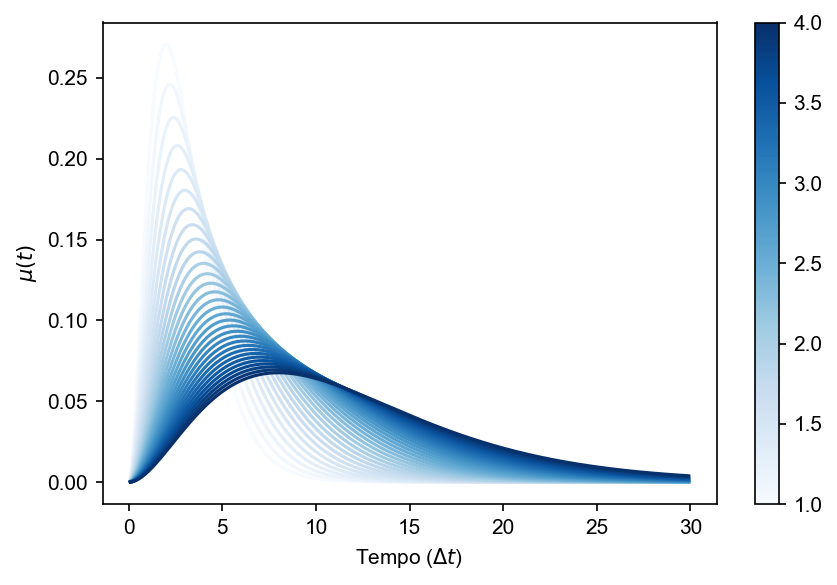

In [28]:
K_tentativas = np.arange(1, 4.1, 0.1)
hui = [0] * len(t)

pl.figure()
m = len(K_tentativas)
colors = pl.cm.Blues(np.linspace(0,1,m))

for j in range(m):
    for i in range(len(t)):
        hui[i] = u_nash(t[i], K_tentativas[j], n)
    pl.plot(t, hui, color=colors[j])
    
    
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=1, vmax=4))
sm._A = []
plt.colorbar(sm)
plt.xlabel("Tempo ($\Delta t$)")
plt.ylabel("$\mu(t)$")
plt.tight_layout()
plt.savefig("nash_3.png", format="png", dpi=300)
plt.show()

# Exercício 4

In [75]:
%reset -f

import numpy as np
import hydroeval as he
from scipy import integrate
from scipy.special import gamma

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
# Ajustando gráficos inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

Avalie a influência da forma do histograma tempo x área (HTA) sobre o hidrograma de saída $Q(t)$ no modelo Clark.
Para tanto, utilize o valor de $K = 2$ e adote:
- $n=1$ (bacia retangular);
- $n=1.5$ (bacia elíptica);
- $n=2$ (bacia em forma de losango).

Represente o HTA com 5 classes.
Utilize os dados de precipitação do Exercício 1.
Apresentar os resultados graficamente.

## Histograma Tempo-Área

Parâmetros da bacia

In [76]:
K  = 2
tc = 2 * K

Classes

In [78]:
pct = [0, 0.2, 0.4, 0.6, 0.8, 1]  # porcentagem de referência

### Bacia retangular ($n = 1$)

In [80]:
n = 1
a = 0.5 ** (1-n)
pA_a = [0, 0, 0, 0, 0, 0]  # porcentagem da área contribuinte

In [160]:
for i, p in enumerate(pct):
    if 0 <= p <= 0.5:
        pA_a[i] = a * p**n
    elif 0.5 < p <= 1:
        pA_a[i] = 1 - a * (1-p)**n

### Bacia elíptica ($n = 1.5$)

In [162]:
n = 1.5
a = 0.5 ** (1-n)
pA_b = [0, 0, 0, 0, 0, 0]  # porcentagem da área contribuinte

In [163]:
for i, p in enumerate(pct):
    if 0 <= p <= 0.5:
        pA_b[i] = a * p**n
    elif 0.5 < p <= 1:
        pA_b[i] = 1 - a * (1-p)**n

### Bacia em forma de losango ($n = 2$)

In [168]:
n = 2
a = 0.5 ** (1-n)
pA_c = [0, 0, 0, 0, 0, 0]  # porcentagem da área contribuinte

In [169]:
for i, p in enumerate(pct):
    if 0 <= p <= 0.5:
        pA_c[i] = a * p**n
    elif 0.5 < p <= 1:
        pA_c[i] = 1 - a * (1-p)**n

### Comparação gráfica

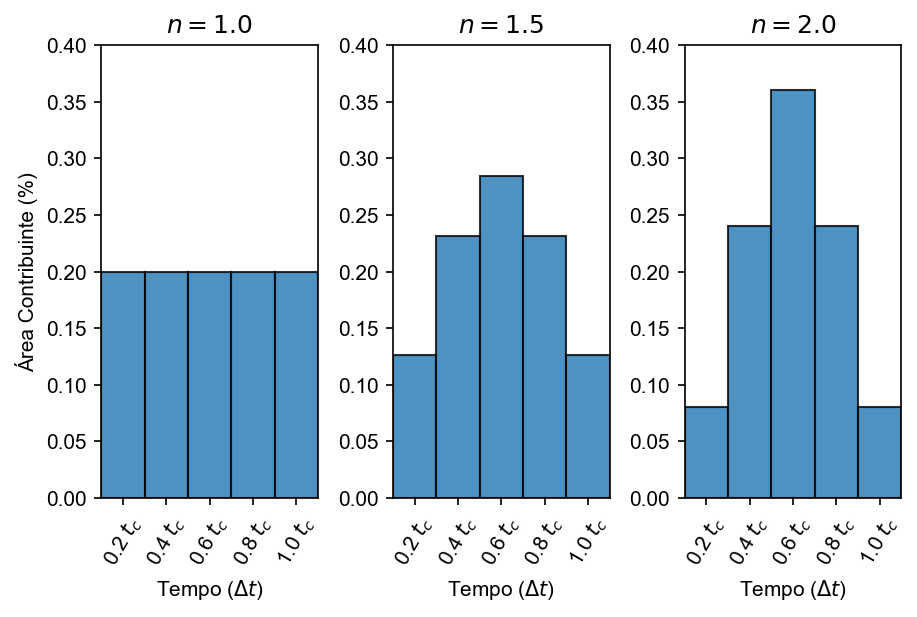

In [191]:
pos = np.arange(len(pct[1:]))
fi_a = [pA_a[i] - pA_a[i-1] for i in range(1,6)]
fi_b = [pA_b[i] - pA_b[i-1] for i in range(1,6)]
fi_c = [pA_c[i] - pA_c[i-1] for i in range(1,6)]
width = 1.0
label = ["0.2 $t_c$", "0.4 $t_c$", "0.6 $t_c$", "0.8 $t_c$", "1.0 $t_c$"]

fig, axs = plt.subplots(1, 3, constrained_layout=True)

axs[0].bar(range(5), fi_a, width, alpha=0.8, edgecolor='black' , linewidth=1)
axs[0].set_xticks(pos)
axs[0].set_xticklabels(label, rotation=60)
axs[0].set_xlim(-0.5, 4.5)
axs[0].set_ylim(0, 0.4)
axs[0].set_title('$n=1.0$')
axs[0].set_xlabel("Tempo ($\Delta t$)")
axs[0].set_ylabel("Área Contribuinte (%)")

axs[1].bar(range(5), fi_b, width, alpha=0.8, edgecolor='black' , linewidth=1)
axs[1].set_xticks(pos)
axs[1].set_xticklabels(label, rotation=60)
axs[1].set_xlim(-0.5, 4.5)
axs[1].set_ylim(0, 0.4)
axs[1].set_title('$n=1.5$')
axs[1].set_xlabel("Tempo ($\Delta t$)")

axs[2].bar(range(5), fi_c, width, alpha=0.8, edgecolor='black' , linewidth=1)
axs[2].set_xticks(pos)
axs[2].set_xticklabels(label, rotation=60)
axs[2].set_xlim(-0.5, 4.5)
axs[2].set_ylim(0, 0.4)
axs[2].set_title('$n=2.0$')
axs[2].set_xlabel("Tempo ($\Delta t$)")

plt.savefig("clark_4.png", format="png", dpi=300)
plt.show()

## Hidrograma de saída da bacia

Hidrograma unitário para $K=2$

In [264]:
t = [i for i in range(1,15)]
hu = np.array([np.exp(-i/K) - np.exp(-(i+1)/K) for i in t])

Conversão em matriz

In [265]:
fi_a = np.array(fi_a)
fi_b = np.array(fi_b)
fi_c = np.array(fi_c)

Translação da chuva

In [266]:
P1_a = np.concatenate((  fi_a * 1.67, np.array([0])))
P2_a = np.concatenate((np.array([0]),   fi_a * 6.66))
P_a  = P1_a + P2_a

P1_b = np.concatenate((  fi_b * 1.67, np.array([0])))
P2_b = np.concatenate((np.array([0]),   fi_b * 6.66))
P_b  = P1_b + P2_b

P1_c = np.concatenate((  fi_c * 1.67, np.array([0])))
P2_c = np.concatenate((np.array([0]),   fi_c * 6.66))
P_c  = P1_c + P2_c

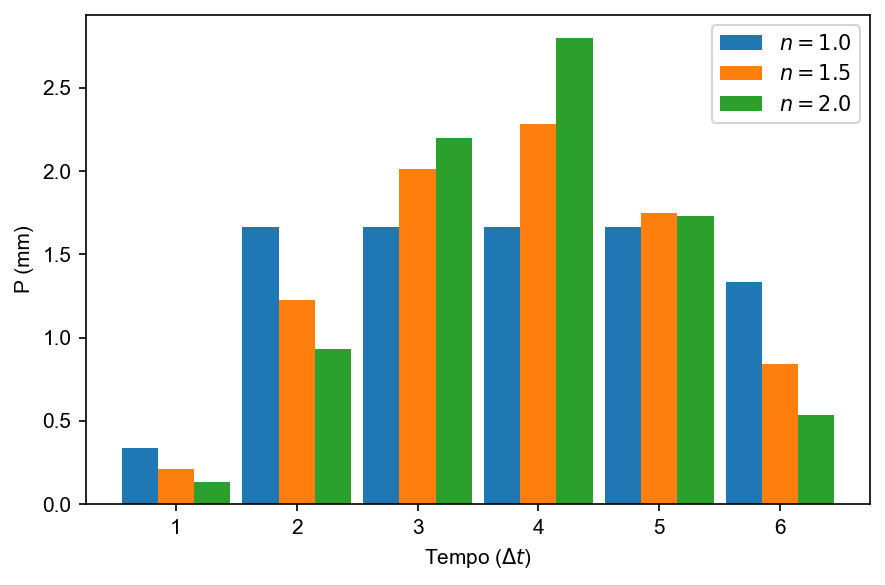

In [320]:
label = np.arange(0, 6)

ax = plt.axes()
ax.bar(label      , P_a, width=0.3, label="$n=1.0$")
ax.bar(label + 0.3, P_b, width=0.3, label="$n=1.5$")
ax.bar(label + 0.6, P_c, width=0.3, label="$n=2.0$")
ax.set_xticks(label + 0.3)
ax.set_xticklabels([1, 2, 3, 4, 5, 6])
plt.xlabel("Tempo ($\Delta t$)")
plt.ylabel("P (mm)")
plt.legend()
plt.tight_layout()
# plt.savefig("clark_4_P.png", format="png", dpi=300)
plt.show()

Aplicando Reservatório Linear Simples

In [318]:
Q_a = np.zeros(hu.size)
Q_b = np.zeros(hu.size)
Q_c = np.zeros(hu.size)

for i, p in enumerate(P_a):
    Q_a[i:] += p * hu[i:]
    
for i, p in enumerate(P_b):
    Q_b[i:] += p * hu[i:]

for i, p in enumerate(P_c):
    Q_c[i:] += p * hu[i:]

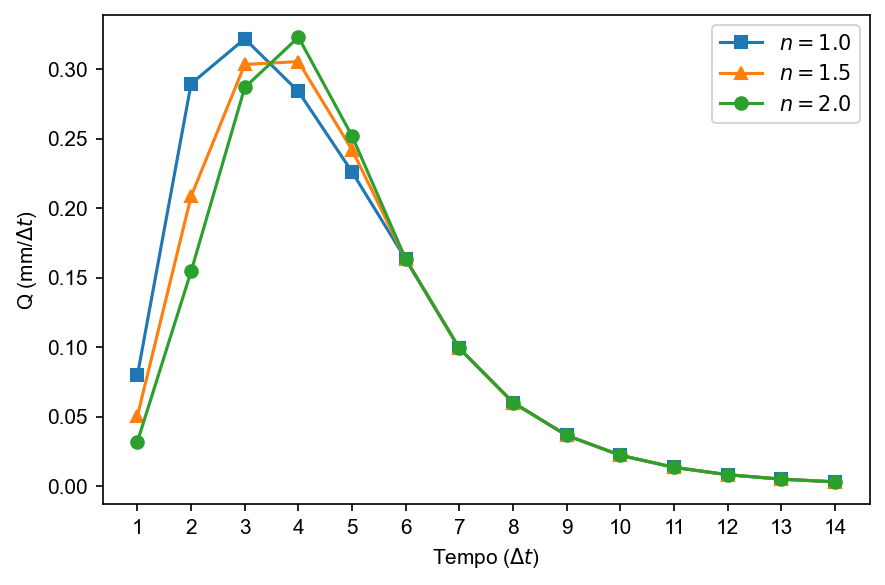

In [323]:
plt.plot(t, Q_a, "s-", label="$n=1.0$")
plt.plot(t, Q_b, "^-", label="$n=1.5$")
plt.plot(t, Q_c, "o-", label="$n=2.0$")
plt.xlabel("Tempo ($\Delta t$)")
plt.ylabel("Q (mm/$\Delta t$)")
plt.xticks(t)
plt.legend()
plt.tight_layout()
# plt.savefig("clark_4_hidrograma.png", format="png", dpi=300)
plt.show()

# Exercício 5

In [324]:
%reset -f

import numpy as np
import hydroeval as he
from scipy import integrate
from scipy.special import gamma

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
# Ajustando gráficos inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

Para entender os resultados do exercício anterior, plote a relação $A_i/A$ para:
- $n=1$ (bacia retangular);
- $n=1.5$ (bacia elíptica);
- $n=2$ (bacia em forma de losango).
   
Para tanto, faça $A_i/A$ variar de 0 a 1 (espaçamento de 0,1) e represente as três curvas em um mesmo gráfico.
Procure relacionar os resultados obtidos com os resultados obtidos no exercício anterior.


Parâmetros da bacia

In [76]:
K  = 2
tc = 2 * K

Classes

In [330]:
pct = [i * 0.1 for i in range(11)]  # porcentagem de referência

### Bacia retangular ($n = 1$)

In [332]:
n = 1
a = 0.5 ** (1-n)
pA_a = [0] * 11  # porcentagem da área contribuinte

In [333]:
for i, p in enumerate(pct):
    if 0 <= p <= 0.5:
        pA_a[i] = a * p**n
    elif 0.5 < p <= 1:
        pA_a[i] = 1 - a * (1-p)**n

### Bacia elíptica ($n = 1.5$)

In [334]:
n = 1.5
a = 0.5 ** (1-n)
pA_b = [0] * 11  # porcentagem da área contribuinte

In [335]:
for i, p in enumerate(pct):
    if 0 <= p <= 0.5:
        pA_b[i] = a * p**n
    elif 0.5 < p <= 1:
        pA_b[i] = 1 - a * (1-p)**n

### Bacia em forma de losango ($n = 2$)

In [336]:
n = 2
a = 0.5 ** (1-n)
pA_c = [0] * 11  # porcentagem da área contribuinte

In [337]:
for i, p in enumerate(pct):
    if 0 <= p <= 0.5:
        pA_c[i] = a * p**n
    elif 0.5 < p <= 1:
        pA_c[i] = 1 - a * (1-p)**n

### Comparação gráfica

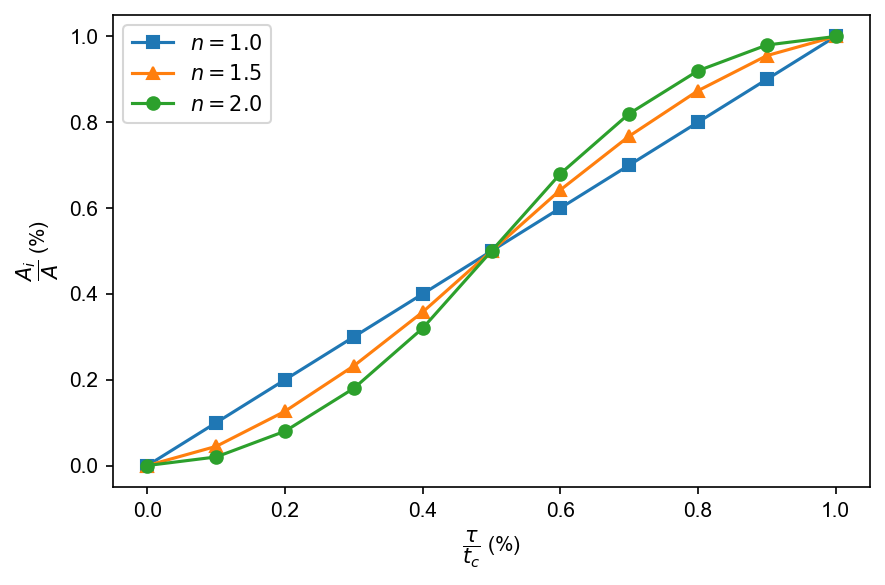

In [350]:
plt.plot(pct, pA_a, "s-", label="$n=1.0$")
plt.plot(pct, pA_b, "^-", label="$n=1.5$")
plt.plot(pct, pA_c, "o-", label="$n=2.0$")
plt.xlabel(r"$\dfrac{\tau}{t_c}$ (%)")
plt.ylabel(r"$\dfrac{A_i}{A}$ (%)")
plt.legend()
plt.tight_layout()
# plt.savefig("clark_5.png", format="png", dpi=300)
plt.show()